### Description

Fundus imaging allows for the visualization of the interior surface of the eye, known as the fundus; and used to examine structures such as the optic disc, retina, and retinal microvasculature. This procedure is commonly used to diagnose and monitor a variety of eye diseases.

### Introduction

Fundus imaging is a type of medical imaging technique that is used to obtain detailed, high-resolution images of the back of the eye, including the retina, the optic nerve, and the macula, an oval-shaped area in the center of the retina used for central vision (Figure 1). These images can provide important information about the health of the eye and can be used to diagnose and monitor a variety of eye diseases and conditions.

One of the key features that can be seen in fundus images is the retinal microvasculature, which refers to the network of small blood vessels that supply blood to the retina. The appearance and structure of the retinal microvasculature can provide information about the health of the eye and can be used to diagnose and monitor a variety of conditions.

In addition, the information provided by fundus imaging can also be used in research to better understand the underlying mechanisms of various eye conditions and as a non-invasive tool for visualization of the general microvascular circulation health and a direct view to part of the central nervous system. As such, the fundus image can serve as a window to systemic health. 

The Human Phenotype Project (HPP) performs fundus imaging on each participant's eyes to produce image and DICOM files. To process and enhance the data, an open source software pipeline: [AutoMorph: Automated Retinal Vascular Morphology Quantification via a Deep Learning Pipeline (Zhou 2022)](https://tvst.arvojournals.org/article.aspx?articleid=2783477), that combines several different deep learning models is used. Specifically for the following steps:
(1) Image pre-processing.
(2) Image quality grading.
(3) Anatomical segmentation (binary vessel segmentation, artery/vein segmentation, and optic disc segmentation).
(4) Various morphological feature measurements such as vessel caliber, tortuosity density, fractal dimension etc. These features were calculated separately for segmented veins and arteries, and also as a combined feature.
The current pipeline does not include automatic identification or clinical interpretation of eye abnormalities such as age-macular degeneration (AMD) or edema, glaucoma signs, microaneurysms etc’ that can be derived from the fundus image.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Images of both eyes were taken with the iCare DRSplus confocal fundus imaging system (ICare). Center view 45° retinal images were collected without pupil dilation.  

![DRSplus confocal fundus imaging system](fundus_drs_plus.png)

### Data availability 
<!-- for the example notebooks -->
- All tabular information is stored in a main parquet file: `fundus.parquet`
- Derived microvasculature information is stored in a secondary parquet file: `microvasculature.parquet`
- Image files including segmentations are stored in subfolders and mapped in the parqet files.

### Summary of available data 
<!-- for the data browser -->
1. Fundus image files.
2. Segmented images of vessels, veins, arteries.
3. Image quality scores and auxiliary data fields.
4. Extracted retinal microvasculature features (such as vessel caliber, tortuosity density, fractal dimension).

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/003-fundus.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/3)

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('fundus')
pl

PhenoLoader for fundus with
76 fields
3 tables: ['fundus', 'microvasculature', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
fundus_image_left,Fundus image (left),Fundus image (left),3,images,Image file (individual),Primary,NaN,Single,string,.jpg,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
fundus_image_right,Fundus image (right),Fundus image (right),3,images,Image file (individual),Primary,NaN,Single,string,.jpg,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),3,fundus,Date,Collection time,NaN,Single,datetime64[ns],NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
timezone,Timezone,Timezone for timestamp columns,3,fundus,Categorical (single),Collection time,001_03,Single,category,NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
collection_timestamp,Collection timestamp,Collection timestamp,3,fundus,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
device_software_version,Software version,Device software Version,3,fundus,Text,Auxiliary,NaN,Single,string,NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
image_view_type_left,Fundus image view type (left),Nasal or central view (left),3,fundus,Categorical (single),Auxiliary,003_02,Single,string,NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
image_view_type_right,Fundus image view type (right),Nasal or central view (right),3,fundus,Categorical (single),Auxiliary,003_02,Single,string,NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN
preprocessing_centre_width_left,preprocessing centre width (left),preprocessing centre width (left),3,images,Continuous,Supporting,NaN,Single,int,NaN,fundus/fundus.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-02-17,NaN


# Plot histogram and ecdf for vessel_density_left at baseline visit


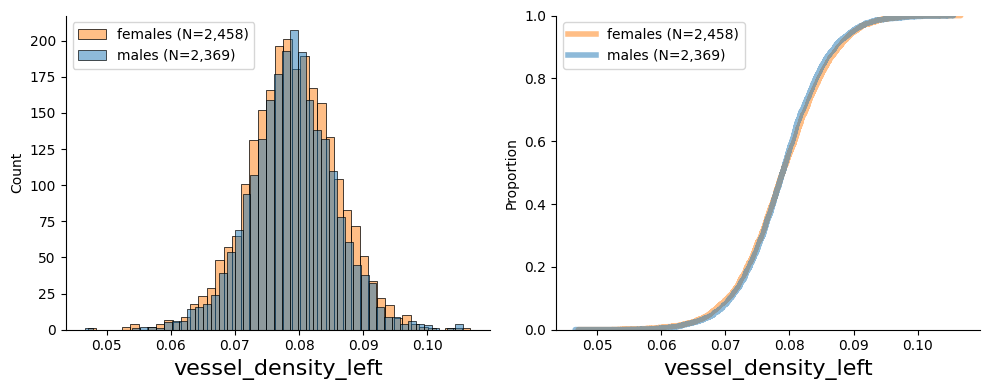

,count,mean,std,min,25%,50%,75%,max
vessel_density_left,4827.0,0.078963,0.006806,0.046615,0.074714,0.078946,0.083297,0.106708


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "vessel_density_left"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)